<h1>Linear regression exercise</h1>

<h2>Imports</h2>

In [1940]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [1941]:
# Save the data into a dataframe
csv_path = "laptopData.csv"
df = pd.read_csv(csv_path)

<h3>Insights into the dataframe</h3>

In [1942]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1943]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1273.0,652.674784,376.493027,0.00,327.00,652.00,980.0000,1302.00
Price,1273.0,59955.814073,37332.251005,9270.72,31914.72,52161.12,79333.3872,324954.72


In [1944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [1945]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [1946]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [1947]:
# Drop the unnamed: 0 column since it seems to just be some type of a index column 
df = df.drop(columns="Unnamed: 0", axis=1)

In [1948]:
df["Company"].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [1949]:
df["TypeName"].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [1950]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

<h3>Checking for missing values</h3>

In [1951]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [1952]:
# Create a new DataFrame with only rows containing missing values within any variables
isna_df = df[df.isna().any(axis=1)]

# Display the rows with missing values with the new DataFrame created for them
isna_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Optimizing data for basic visualization</h3>

In [1953]:
# Display the Memory value counts to see all the different memory types
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

In [1954]:
# Split Memory into two parts if there are multiple storage types
df[["Primary_Storage", "Secondary_Storage"]] = df["Memory"].str.split(" \+ ", expand=True, n=1)

# Display the Primary_Storage value counts to see all the different primary storage types
df['Primary_Storage'].value_counts()

Primary_Storage
256GB SSD              487
1TB HDD                218
128GB SSD              168
512GB SSD              136
500GB HDD              130
32GB Flash Storage      37
2TB HDD                 16
1TB SSD                 15
64GB Flash Storage      15
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
64GB SSD                 1
32GB HDD                 1
?                        1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [1955]:
# Display the row with Memory with value ?
droppable_row = df.loc[df['Memory'] == '?']
droppable_row

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,?,None


In [1956]:
df = df.drop(droppable_row.index)

In [1957]:
# Display the Secondary_Storage value counts to see all the different primary storage types
df['Secondary_Storage'].value_counts()

Secondary_Storage
1TB HDD         181
2TB HDD          15
256GB SSD         3
500GB HDD         2
1.0TB Hybrid      2
512GB SSD         1
Name: count, dtype: int64

In [1958]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None


In [1959]:
# Function to check if storage contains TB or GB and convert size accordingly
def convert_storage_to_gb(storage):
    if pd.notna(storage):  # Ensure storage is not NaN
        if "TB" in storage:
            size = float(storage.split("TB")[0].strip()) * 1024  # Convert TB to GB
            return size
        elif "GB" in storage:
            size = float(storage.split("GB")[0].strip())  # Keep GB as is
            return size
    return 0  # Default for missing values

# Apply conversion to Primary and Secondary Storage
df["Primary_Size(GB)"] = df["Primary_Storage"].apply(convert_storage_to_gb)
df["Secondary_Size(GB)"] = df["Secondary_Storage"].apply(convert_storage_to_gb)

In [1960]:
df['Primary_Size(GB)'].value_counts()

Primary_Size(GB)
256.0     495
1024.0    243
128.0     173
512.0     138
500.0     130
32.0       44
0.0        30
64.0       16
2048.0     16
16.0       10
180.0       4
240.0       1
8.0         1
508.0       1
Name: count, dtype: int64

In [1961]:
df['Secondary_Size(GB)'].value_counts()

Secondary_Size(GB)
0.0       1098
1024.0     183
2048.0      15
256.0        3
500.0        2
512.0        1
Name: count, dtype: int64

In [1962]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [1963]:
df = df.drop(columns=['Memory'], axis=1)
df.rename(columns={"Inches": "ScreenSize"}, inplace=True)

In [1964]:
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [1965]:
# Extract numeric values before converting to float
df["Weight"] = df["Weight"].str.extract(r"(\d+\.?\d*)").astype(float)
df["Ram"] = df["Ram"].str.extract(r"(\d+)").astype(float)
df["ScreenSize"] = df["ScreenSize"].str.extract(r"(\d+)").astype(float)

Basic Visualization


<Axes: >

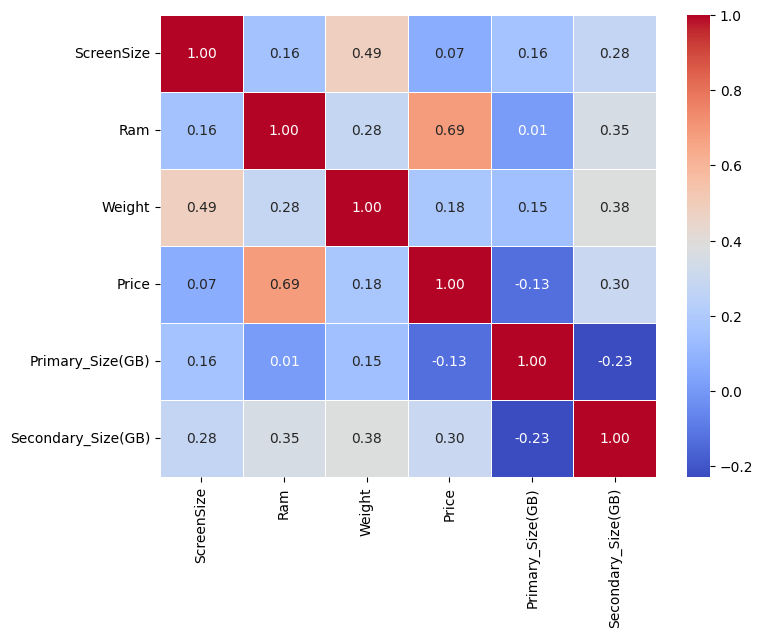

In [1966]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


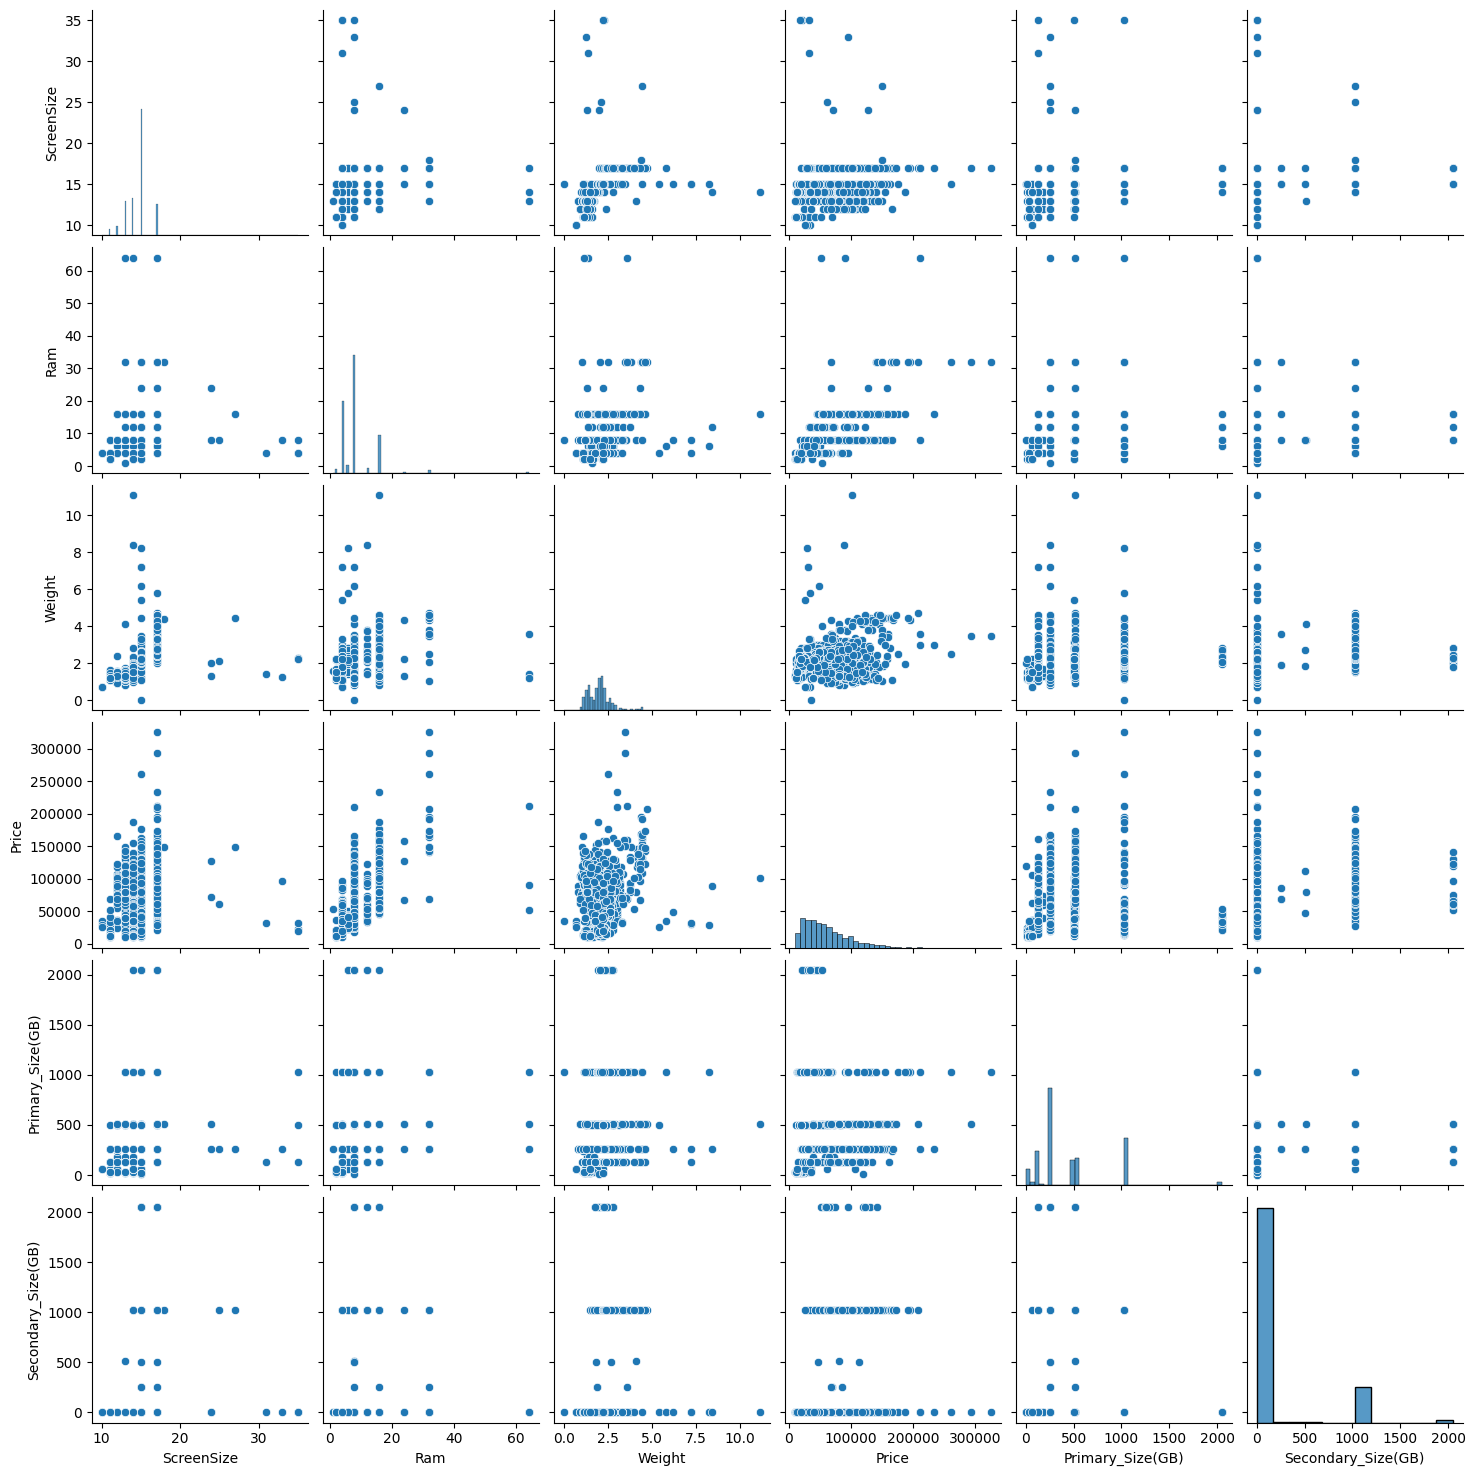

In [1967]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

<h1>Optimization for machine learning</h1>

In [1968]:
df.columns

Index(['Company', 'TypeName', 'ScreenSize', 'ScreenResolution', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price', 'Primary_Storage',
       'Secondary_Storage', 'Primary_Size(GB)', 'Secondary_Size(GB)'],
      dtype='object')

In [1969]:
# df["Gpu_Brand"] = df["Gpu"].astype(str).apply(lambda x: x.split()[0])

In [1970]:
# df["Gpu_Series(Number)"] = df["Gpu"].str.extract(r'(\d+\.\d+)').astype(float)

In [1971]:
# df["Cpu_Brand"] = df["Cpu"].astype(str).apply(lambda x: x.split()[0])

In [1972]:
# df["Cpu_Speed(GHz)"] = df["Cpu"].str.extract(r'(\d+\.\d+)').astype(float)

In [1973]:
# List of categorical columns to convert into binary columns
# categorical_columns = ['Company', 'TypeName', 'ScreenResolution', "Cpu_Brand", "Gpu_Brand",'Gpu_Brand', 'Gpu_Series(Number)', 'OpSys', 'Primary_Storage', 'Secondary_Storage']

# Loop through each categorical column and apply binary conversion
# for col in categorical_columns:
    # if col in df.columns:  # Ensure the column exists in df
       # for unique_value in df[col].unique():
            # df[unique_value] = (df[col] == unique_value).astype(int)
       #  df.drop(columns=[col], inplace=True)  # Drop the original categorical column

In [1974]:
# categorical_columns

In [1975]:
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.0,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256GB SSD,None,256.0,0.0


In [1976]:
df["RAM_per_Price"] = df["Ram"] / df["Price"]

<h3>Now let's deal with the missing values</h3>

Fun fact with this dataset it's required to drop missing rows after converting all categorical_columns to binary, otherwise support variables would  contained missing values for unknown reasons even after dropping them earlier during checking for missing values.

In [1977]:
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),RAM_per_Price
0,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128GB SSD,None,128.0,0.0,0.000112
1,Apple,Ultrabook,13.0,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,128GB Flash Storage,None,128.0,0.0,0.000167
2,HP,Notebook,15.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,256GB SSD,None,256.0,0.0,0.000261
3,Apple,Ultrabook,15.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,512GB SSD,None,512.0,0.0,0.000118
4,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256GB SSD,None,256.0,0.0,0.000083


In [1978]:
# Removes rows where at least one NaN exists
df = df.dropna(axis=0)

In [1979]:
# Check if there is any duplicates within the DataFrame
int(df.duplicated().sum())

0

In [1980]:
df = df.drop_duplicates()

In [1981]:
X = df.drop(columns=["Price"], axis=1)
y = df["Price"]

In [1982]:
X.isna().sum().sum()

np.int64(0)

In [1983]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1987]:
X_train = pd.get_dummies(X_train, columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'ScreenResolution'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'ScreenResolution'], drop_first=True)


In [1985]:
X_train.columns = X_train.columns.astype(str)

In [1988]:
 # create an empty linear regression model
# and fit it with our data (fit => start training with the data)

# Create an empty linear regression model to fit it with our DataFrame
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: '128GB SSD'

In [ ]:
X_test.columns = X_test.columns.astype(str)


<h3>Error & Performance Metrics</h3>

In [ ]:
predictions = model.predict(X_test)

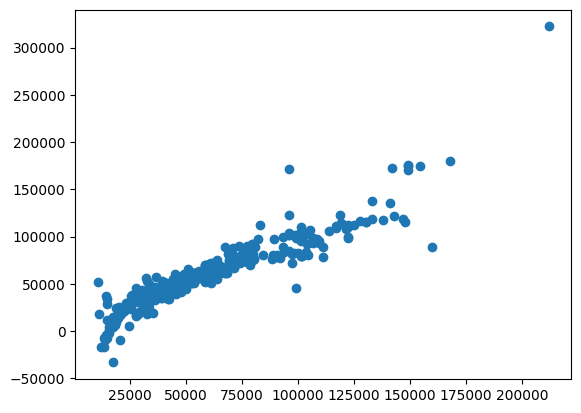

In [ ]:
plt.scatter(y_test, predictions)
plt.show()

In [ ]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
9136.17 $

MSE
199255803.88 $^2

RMSE:
14115.8 $

R-squared:
0.84


In [ ]:
mae_percentage = metrics.mean_absolute_error(y_test, predictions) / df["Price"].mean()
mae_percentage = round(mae_percentage, 2) * 100
print(f"MAE difference in % towards average: {mae_percentage} %")

rmse_percentage = np.sqrt(metrics.mean_squared_error(y_test, predictions)) / df["Price"].mean()
rmse_percentage = round(rmse_percentage, 2) * 100
print(f"RMSE difference in % towards average: {rmse_percentage} %")

MAE difference in % towards average: 15.0 %
RMSE difference in % towards average: 23.0 %


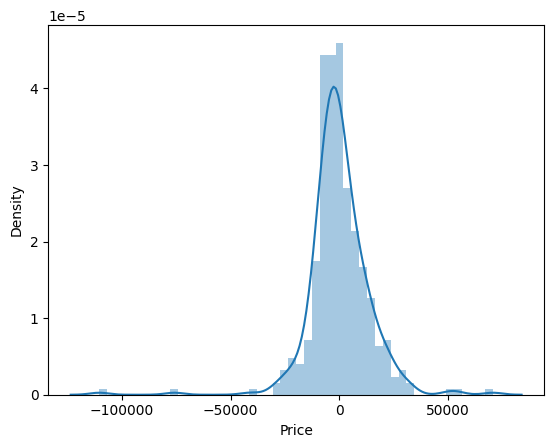

In [ ]:
sns.distplot((y_test - predictions))
plt.show()
plt.close()

In [ ]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)
print(f"Index: {tester_row.index[0]}")
print(tester_row)


Index: 705
     ScreenSize  Ram  Weight    Price  Primary_Size(GB)  Secondary_Size(GB)  \
705        15.0  8.0    2.18  42357.6             256.0                 0.0   

     Cpu_Speed(GHz)  Apple  HP  Acer  ...  508GB Hybrid  1.0TB HDD  None  \
705             2.5      0   0     0  ...             0          0     0   

      1TB HDD   256GB SSD   2TB HDD   500GB HDD   512GB SSD   1.0TB Hybrid  \
705         0           0         0           0           0              0   

     RAM_per_Price  
705       0.000189  

[1 rows x 120 columns]


In [ ]:
X_tester_row = tester_row.drop(columns=["Price"])
y_tester_row = tester_row["Price"]


In [ ]:
X_tester_row.columns = X_tester_row.columns.astype(str)

In [ ]:
y_pred_tester = model.predict(X_tester_row)

In [ ]:
result = model.predict(X_tester_row)[0]

print()
print(f"Predicted computers price with given parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted computers price with given parameters:
42602.25 $
----------------


In [ ]:
row = df.loc[tester_row.index[0]]

row["Price"]

np.float64(42357.6)

In [ ]:
precision = result/row["Price"]

precision

# Highest given accuracy was 95%, if this procent goes above 100% it means the model is overfitting

np.float64(1.0057758145600344)